In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math

In [2]:
from scipy.io import wavfile

In [3]:
rate, x = wavfile.read('test.wav')

In [4]:
rate

44100

In [5]:
y = []
for i in range(44100):
    y.append(x[i])

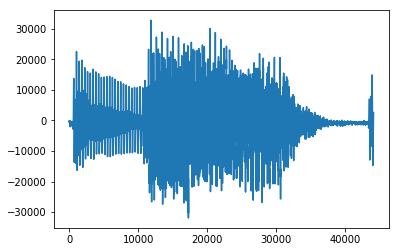

In [6]:
plt.plot(y)

In [7]:
from scipy.fftpack import fft,ifft,dct,idct

In [8]:
c = dct(y)
ym = idct(c)/88200

In [9]:
ym

array([-456., -463., -353., ..., 2197., 2384., 2570.])

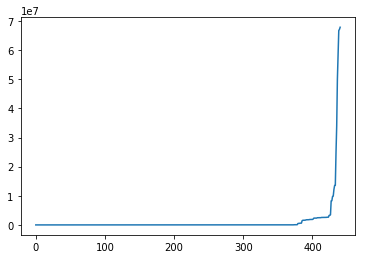

In [10]:
Cl = []
for L in range(1,442):
    cm = []
    sum = 0
    for i in range(44100-(100*L)):
        cm.append(c[i])
    for i in range(44100-(100*L),44100):
        cm.append(0)
    xm = idct(cm)/(88200)
    for i in range(44100):
        sum = sum + ((y[i]-xm[i])**2)
        q = sum/44100
    Cl.append(q)
plt.plot(Cl)

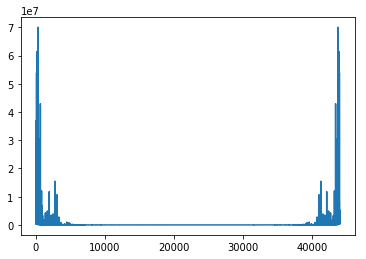

In [11]:
z = fft(y)
plt.plot(abs(z))

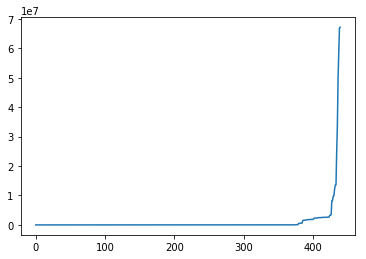

In [14]:

Dl = []
L = np.arange(100,44100,100)
for j in range(len(L)):
    zm = []
    sum = 0
    for i in range(math.floor((44101-L[j])/2)):
        zm.append(z[i])
    for i in range(math.floor((44101-L[j])/2),math.ceil((44101+L[j])/2)):
        zm.append(0)
    for i in range(math.ceil((44101+L[j])/2),44100):
        zm.append(z[i])
    dm = ifft(zm)
    for i in range(44100):
        sum = sum + ((abs(y[i]-dm[i]))**2)
        q = sum/44100
    Dl.append(q)
plt.plot(Dl)

ERROR! Session/line number was not unique in database. History logging moved to new session 53


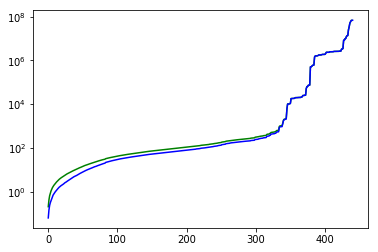

In [36]:
plt.semilogy(Dl,color='green')
plt.semilogy(Cl,color='blue')

In [20]:
import pywt

In [40]:
a,d = pywt.dwt(y,'haar')

In [109]:
at = pywt._thresholding.threshold(a,0,'soft')
a

array([-649.83113191, -412.95036021, -299.81327522, ..., 2449.41789003,
       2975.50533523, 3503.006994  ])

In [85]:
at

array([0., 0., 0., ..., 0., 0., 0.])

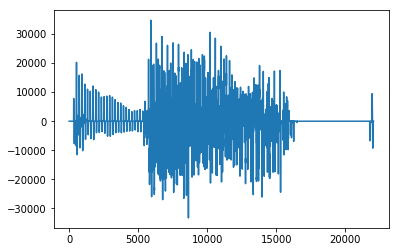

In [86]:
plt.plot(at)

In [110]:
count = 0
for i in range(len(at)):
    if at[i] == 0:
        count = count + 1

In [111]:
count

5

In [114]:
dt = pywt._thresholding.threshold(d,1000,'soft')
count = 0
for i in range(len(dt)):
    if dt[i] == 0:
        count = count + 1
count

20509

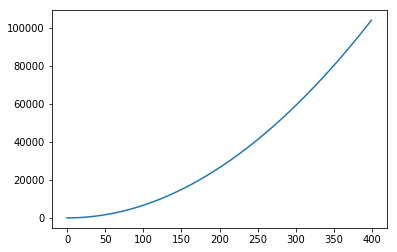

In [118]:
Hl = []
L = np.arange(0,0.04,0.0001)
for i in range(len(L)):
    dt = pywt._thresholding.threshold(d,L[i]*np.std(d),'soft')
    at = pywt._thresholding.threshold(a,L[i]*np.std(a),'soft')
    ym = pywt.idwt(at,dt,'haar')
    sum = 0
    for i in range(len(y)):
        sum = sum + ((y[i]-ym[i])**2)
    q = sum/44100
    Hl.append(q)
plt.plot(Hl)

[0, 450, 0.01, 10000000]

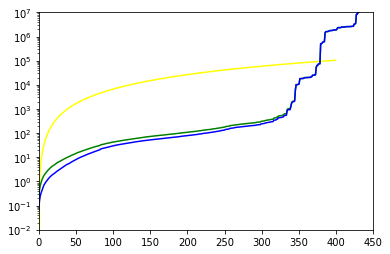

In [119]:
plt.semilogy(Hl,color= 'yellow')
plt.semilogy(Dl,color='green')
plt.semilogy(Cl,color='blue')
plt.axis([0,450,0.01,10000000])